<a href="https://colab.research.google.com/github/PedramDbg/CS-MachineLearning/blob/main/Assignment_2%5CML_HW_02_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2:**
For the given data on canvas, construct a neural network for the regression task. Your network must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the hidden layer(s). You can choose the number of neurons in each layer using your intuition.
The data is already split to have your input data for training (X_train.csv) and testing (X_train.csv) and their corresponding target values Y_train.csv and Y_test.csv, respectively. You can load the data as follows:
X_train = np.loadtxt("X_train.csv")
Implement the backpropagation algorithm and train your network until convergence.

Answer the following questions:

```
# This is formatted as code
```



1. What is the activation function that you will choose for the output layer? Justify your answer briefly.

Answer: Since we are going to build a regression model with real values in the output, linear activation function is a good fit for the output layer. 

2. How many neurons should there be in the output layer? Why?

As the output (label) has dimension "1", the designed network must have just "1" neuron in the output layer.

In [44]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#define the required functions

#normalize and standardize the data
def normalizer(x):
    mean_x = np.mean(x, axis=0)
    std_x = np.std(x, axis=0)
    x = (x - mean_x) / std_x
    return x

#initialize weights
def initilizer(n0, n1, n2):
    w1 = np.random.randn(n1, n0) * 0.01
    b1 = np.random.randn(n1, 1)
    w2 = np.random.randn(n2, n1) * 0.01
    b2 = np.random.randn(n2, 1)
    param = {'w1':w1, 'b1':b1,'w2':w2,'b2':b2}
    return param

#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#relu function
def relu(z):
    return np.maximum(0,z)

#forward propagation
def forward_propagation(x, param, activation):
    w1 = param['w1']
    b1 = param['b1']
    w2 = param['w2']
    b2 = param['b2']
    
    z1 = np.dot(w1, x) + b1
    
    if activation == "sigmoid":
        a1 = sigmoid(z1)
    elif activation == "relu":
        a1 = relu(z1)
    elif activation == "tanh":
        a1 = np.tanh(z1)
    else:
        a1 = sigmoid(z1)
    #print(a1.shape)
    
    z2 = np.dot(w2, a1) + b2
    a2 = z2
    
    cache = {'z1':z1, 'a1':a1, 'z2':z2, 'a2':a2}
    return cache


#compute cost
def cost(x, y, cache):
    a2 = cache['a2']
    m = np.shape(y)[1]

    loss = (1/m) * (y - a2) @ (y - a2).T  #1/2m????
    loss = float(np.squeeze(loss))
    return loss

#backward propagation
def backward_propagation(x, y, param, cache, activation):
    m = np.shape(x)[1]

    w1 = param['w1']
    b1 = param['b1']
    w2 = param['w2']
    b2 = param['b2']
    
    z1 = cache['z1']
    a1 = cache['a1']
    z2 = cache['z2']
    a2 = cache['a2']
    
    dz2 = a2 - y
    dw2 = (1/m) * np.dot(dz2,a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    
    if activation == "sigmoid":
        dz1 = np.dot(w2.T, dz2) * sigmoid(z1) * (1 - sigmoid(z1))
    elif activation == "relu":
        dz1 = np.array(np.dot(w2.T, dz2), copy=True)
        dz1[z1 <= 0] = 0
    elif activation == "tanh":
        dz1 = np.dot(w2.T, dz2) * (1 - np.tanh(z1)*np.tanh(z1))
    #print('----------===', dz1.shape)

    dw1 = (1/m) * np.dot(dz1, x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    #print('----------===', dw1.shape)
    grad = {'dz1':dz1, 'dw1':dw1, 'db1':db1, 'dz2':dz2, 'dw2':dw2, 'db2':db2}
    
    return grad

#update the parameters
def update(x, y, param, grad, lr):
    w1 = param['w1']
    b1 = param['b1']
    w2 = param['w2']
    b2 = param['b2']
    
    dw1 = grad['dw1']
    db1 = grad['db1']
    dw2 = grad['dw2']
    db2 = grad['db2']
    
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2
    
    param = {'w1':w1, 'b1':b1,'w2':w2,'b2':b2}
    
    return param

In [46]:
#import the data
path_Xtrain = "/content/drive/My Drive/Machine_Learning/Assignments/assignment_2/X_train.csv"
path_Ytrain = "/content/drive/My Drive/Machine_Learning/Assignments/assignment_2/Y_train.csv"
path_Xtest = "/content/drive/My Drive/Machine_Learning/Assignments/assignment_2/X_test.csv"
path_Ytest = "/content/drive/My Drive/Machine_Learning/Assignments/assignment_2/Y_test.csv"

xtrain = pd.read_csv(path_Xtrain, delimiter = " ").to_numpy()
ytrain = pd.read_csv(path_Ytrain, delimiter = " ").to_numpy()
xtest = pd.read_csv(path_Xtest, delimiter = " ").to_numpy()
ytest = pd.read_csv(path_Ytest, delimiter = " ").to_numpy()
#standardize the data
xtrain_norm = normalizer(xtrain).T
ytrain_norm = normalizer(ytrain).T
xtest_norm = normalizer(xtest)
ytest_norm = normalizer(ytest)


In [47]:
n0, m = np.shape(xtrain_norm)
n1 = 5 #number of units in layer_1
n2, _ = np.shape(ytrain_norm) #n2:the size of the output layer

J_vec = []
lr = 0.1
param = initilizer(n0, n1, n2)
n_iteration = 1000
#train the network with the training set
for i in range(n_iteration):
    #apply forward propagation to derive cache
    cache = forward_propagation(xtrain_norm, param, activation="sigmoid")
    #compute the cost
    loss = cost(xtrain_norm, ytrain_norm, cache)
    J_vec.append(loss)
    #apply backward propagation to derive gradients
    grad = backward_propagation(xtrain_norm, ytrain_norm, param, cache, activation="sigmoid")
    #update the parameters
    param = update(xtrain_norm, ytrain_norm, param, grad, lr)

w1 = param["w1"]
b1 = param["b1"]
w2 = param["w2"]
b2 = param["b2"]
a2 = cache['a2']
#print the final (trained) parameters
print("w1 (weight of 1st layer  = " , w1)
print("b1 (bais of 1st layer  = " , b1)
print("w2 (weight of 2nd layer  = " , w2)
print("b2 (bais of 2nd layer  = " , b2)

error_train = np.sqrt(((a2 - ytrain_norm) ** 2).mean())
print("error_train = ", error_train)

w1 (weight of 1st layer  =  [[-0.01605993 -0.82759739]
 [-0.02915706 -0.73574057]
 [ 0.01092617 -1.15480017]
 [-0.02346546 -0.82883787]
 [ 0.03536744 -1.21781547]]
b1 (bais of 1st layer  =  [[-0.5579982 ]
 [-0.72176106]
 [ 0.03194927]
 [-0.57194936]
 [ 0.36199243]]
w2 (weight of 2nd layer  =  [[-0.74940027 -0.62032882 -1.31167842 -0.75057065 -1.31312483]]
b2 (bais of 2nd layer  =  [[2.19754342]]
error_train =  0.08145579344239405


3. Report the average MSE loss and the accuracy.


In [48]:
error_ave = np.average(np.array(J_vec))
print("The average error for the designed model is:", error_ave)

The average error for the designed model is: 0.08680293019516384


4. Plot the loss and accuracy as a function of the number of iterations.

Text(0, 0.5, 'cost')

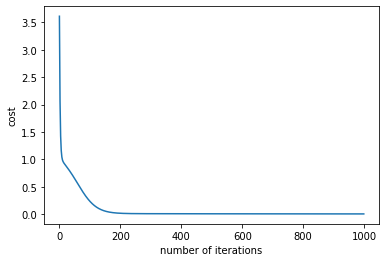

In [49]:
#plot the cost
plt.plot(np.arange(n_iteration), J_vec)
plt.xlabel('number of iterations')
plt.ylabel('cost')

5. What is the effect of the learning rate on the training process? Vary the learning rate to be
between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

learning rate= 0.001 : average error= 0.046708579261398556
learning rate= 0.05357894736842105 : average error= 0.03307882595898919
learning rate= 0.1061578947368421 : average error= 0.02588830842386527
learning rate= 0.15873684210526315 : average error= 0.02132571945095076
learning rate= 0.2113157894736842 : average error= 0.018144486976766763
learning rate= 0.26389473684210524 : average error= 0.015791372940437722
learning rate= 0.3164736842105263 : average error= 0.013976663742152515
learning rate= 0.36905263157894735 : average error= 0.012532430455815242
learning rate= 0.4216315789473684 : average error= 0.011354220060614257
learning rate= 0.47421052631578947 : average error= 0.010373582991773397
learning rate= 0.5267894736842105 : average error= 0.009543860797022742
learning rate= 0.5793684210526315 : average error= 0.008832294622345936
learning rate= 0.6319473684210526 : average error= 0.008215350968880781
learning rate= 0.6845263157894736 : average error= 0.007675751737201917
lea

Text(0, 0.5, 'error')

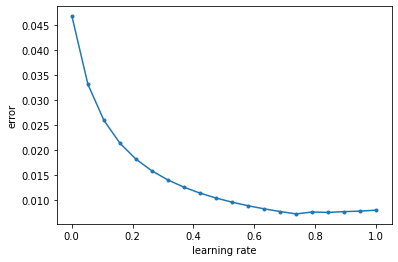

In [50]:
n_iteration = 1000   # number of iterations
num_lr = 20 #number of implemented learning rates
lr_lst = np.linspace(0.001, 1, num_lr)
err_lst = []
for lr in lr_lst:
  for i in range(n_iteration):
    #apply forward propagation to derive cache
    cache = forward_propagation(xtrain_norm, param, activation="sigmoid")
    #compute the cost
    loss = cost(xtrain_norm, ytrain_norm, cache)
    J_vec.append(loss)
    #apply backward propagation to derive gradients
    grad = backward_propagation(xtrain_norm, ytrain_norm, param, cache, activation="sigmoid")
    #update the parameters
    param = update(xtrain_norm, ytrain_norm, param, grad, lr)
  error_ave = np.average(np.array(J_vec))
  err_lst.append(error_ave)
  print('learning rate=', lr, ': average error=', error_ave)

plt.plot(lr_lst, err_lst, '.-')
plt.xlabel('learning rate')
plt.ylabel('error')

6. What is the effect of the number of neurons in the hidden layer? To answer this question,
you will need to consider and answer the following:

a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?

b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

Answer 6.a: The update rule is the same for any number od hidden layers as the dimensions of the parameters are compatible overally. But the dimension of the parameters (weights and biases) will change.

Totally, the dimension of parameters depends on the number of features in the input matrix (n0), the number of nodes in the hidden layer (n1) and the number of nodes in the output layer (n2).


Answer 6.b:

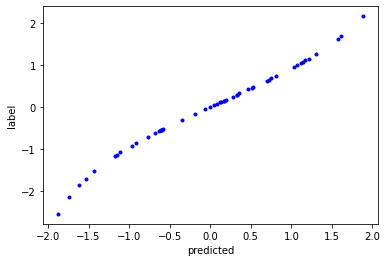

number of hidden layers= 1 , average error= 0.009104696132392884


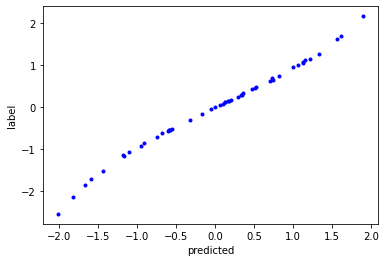

number of hidden layers= 2 , average error= 0.010115648653798995


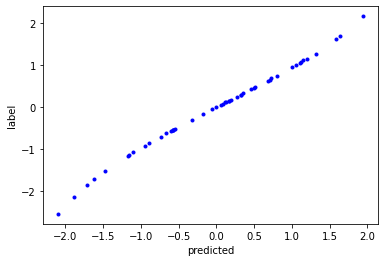

number of hidden layers= 3 , average error= 0.010684701578653855


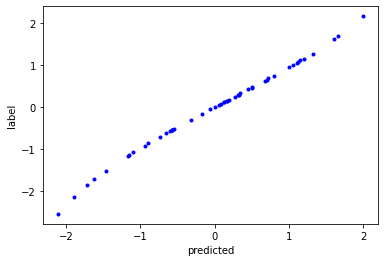

number of hidden layers= 4 , average error= 0.011325627658371203


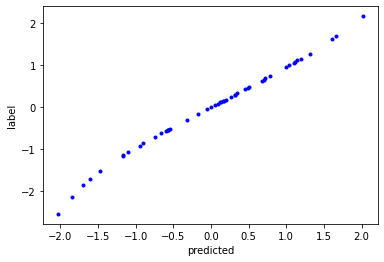

number of hidden layers= 5 , average error= 0.012113592080721105


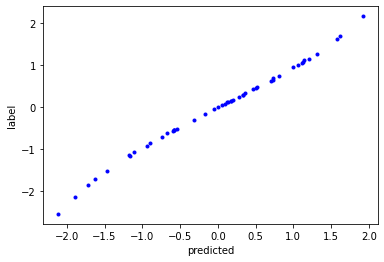

number of hidden layers= 6 , average error= 0.016039774142485683


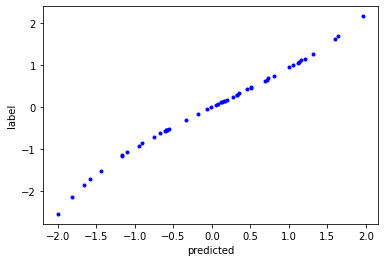

number of hidden layers= 7 , average error= 0.016630226093679427


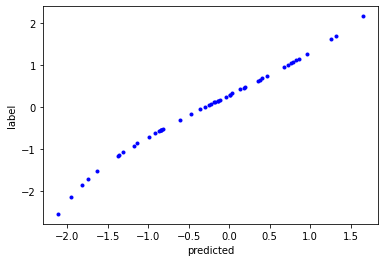

number of hidden layers= 8 , average error= 0.01785437515674654


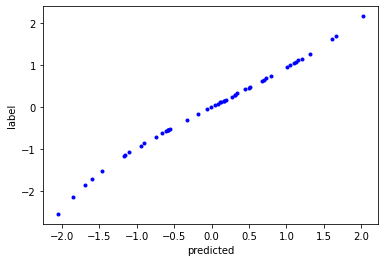

number of hidden layers= 9 , average error= 0.018709820239217426


In [51]:
n_iteration = 600
n0, _ = np.shape(xtrain_norm)
n2, _ = np.shape(ytrain_norm)
err_lst = []
lr = 0.7
for n1 in np.arange(1, 10):
    w1 = np.random.randn(n1, n0) * 0.01
    b1 = np.random.randn(n1, 1)
    w2 = np.random.randn(n2, n1) * 0.01
    b2 = np.random.randn(n2, 1)
    param = {'w1':w1, 'b1':b1,'w2':w2,'b2':b2}
    for i in range(n_iteration):
      #apply forward propagation to derive cache
      cache = forward_propagation(xtrain_norm, param, activation="sigmoid")
      #compute the cost
      loss = cost(xtrain_norm, ytrain_norm, cache)
      J_vec.append(loss)
      #apply backward propagation to derive gradients
      grad = backward_propagation(xtrain_norm, ytrain_norm, param, cache, activation="sigmoid")
      #update the parameters
      param = update(xtrain_norm, ytrain_norm, param, grad, lr)
      error_ave = np.average(np.array(J_vec))
      err_lst.append(error_ave)
      
    cache_test = forward_propagation(xtest_norm.T, param, activation='sigmoid')
    y_hat = cache_test['a2']
    plt.plot(y_hat, ytest_norm.T, '.', color='blue')
    plt.xlabel('predicted')
    plt.ylabel('label')
    plt.show()

    print('number of hidden layers=', n1,  ', average error=', error_ave)



7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.

a. Will you need to change the update rule?

b. What is the change that you need to make to achieve this experiment?

c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

Answer 7.a: Yes, the update rule must be changed in each case since the activation functions and their derivatives exist in forward and backward propagation. 

Answer 7.b: The activation functions in the forward propagation must be changed. Also, the derivatives of the activation functions in backward propagation must be changed as they are required when we employ chain rule to calculate the derivatives of the parameters.


Answer 7.c: The Relu activation function seems to give the better results.

The average error for Relu activation function is:  0.053210051509154574


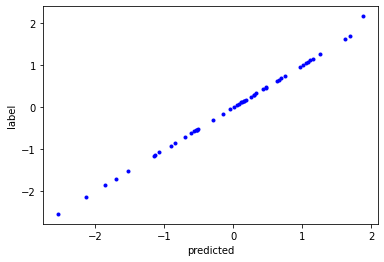

In [52]:
#activation = Relu 
n0, m = np.shape(xtrain_norm)
n1 = 5 #number of units in layer_1
n2, _ = np.shape(ytrain_norm) #n2:the size of the output layer

J_vec = []
lr = 0.1
param = initilizer(n0, n1, n2)
n_iteration = 1000

for i in range(n_iteration):
  #apply forward propagation to derive cache
  cache = forward_propagation(xtrain_norm, param, activation="relu")
  #compute the cost
  loss = cost(xtrain_norm, ytrain_norm, cache)
  J_vec.append(loss)
  #apply backward propagation to derive gradients
  grad = backward_propagation(xtrain_norm, ytrain_norm, param, cache, activation="relu")
  #update the parameters
  param = update(xtrain_norm, ytrain_norm, param, grad, lr)

error_ave = np.average(np.array(J_vec))
print('The average error for Relu activation function is: ', error_ave)

cache_test = forward_propagation(xtest_norm.T, param, activation='relu')
y_hat = cache_test['a2']
plt.plot(y_hat, ytest_norm.T, '.', color='blue')
plt.xlabel('predicted')
plt.ylabel('label')
plt.show()

The average error for Relu activation function is:  0.03962297777163586


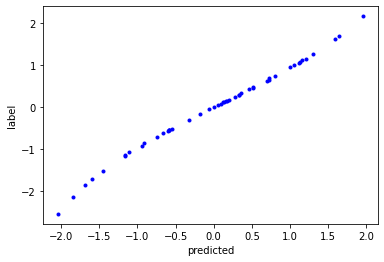

In [53]:
#activation = tanh 
n0, m = np.shape(xtrain_norm)
n1 = 5 #number of units in layer_1
n2, _ = np.shape(ytrain_norm) #n2:the size of the output layer

J_vec = []
lr = 0.1
param = initilizer(n0, n1, n2)
n_iteration = 1000

for i in range(n_iteration):
  #apply forward propagation to derive cache
  cache = forward_propagation(xtrain_norm, param, activation="tanh")
  #compute the cost
  loss = cost(xtrain_norm, ytrain_norm, cache)
  J_vec.append(loss)
  #apply backward propagation to derive gradients
  grad = backward_propagation(xtrain_norm, ytrain_norm, param, cache, activation="tanh")
  #update the parameters
  param = update(xtrain_norm, ytrain_norm, param, grad, lr)

error_ave = np.average(np.array(J_vec))
print('The average error for Relu activation function is: ', error_ave)

cache_test = forward_propagation(xtest_norm.T, param, activation='tanh')
y_hat = cache_test['a2']
plt.plot(y_hat, ytest_norm.T, '.', color='blue')
plt.xlabel('predicted')
plt.ylabel('label')
plt.show()

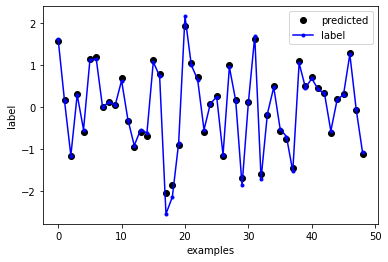

In [63]:
m_test = xtest_norm.shape[0]
plt.figure(1)
plt.plot(np.arange(m_test), y_hat.T, 'o', color='black', label="predicted")
plt.plot(np.arange(m_test), ytest_norm, '.-', color='blue', label="label")
plt.xlabel('examples')
plt.ylabel('label')
plt.legend(loc="upper right")
plt.show()